In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats


In [2]:
data_buffer = pd.read_csv(r"Data_of_Attack_Back_BufferOverflow.csv")

In [3]:
data_buffer 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0184,0,0.05,0.00,0.01511,0.02957,0,0,0,0.3,...,0.001,0.003,0.1,0,0.100,0.067,0,0,0.000,0.000
1,0.0305,0,0.05,0.00,0.01735,0.02766,0,0,0,0.3,...,0.002,0.004,0.1,0,0.050,0.050,0,0,0.000,0.000
2,0.0150,0,0.05,0.00,0.01587,0.06707,0,0,0,0.1,...,0.001,0.001,0.1,0,0.100,0.000,0,0,0.000,0.000
3,0.0060,0,0.05,0.00,0.02328,0.04551,0,0,0,0.3,...,0.001,0.001,0.1,0,0.100,0.000,0,0,0.000,0.000
4,0.0158,0,0.05,0.00,0.01567,0.03095,0,0,0,0.3,...,0.002,0.002,0.1,0,0.050,0.000,0,0,0.000,0.000
5,0.0113,0,0.05,0.00,0.06274,0.16771,0,0,0,0.5,...,0.001,0.001,0.1,0,0.100,0.000,0,0,0.000,0.000
6,0.0053,0,0.05,0.00,0.02628,0.03860,0,0,0,0.3,...,0.002,0.002,0.1,0,0.050,0.000,0,0,0.000,0.000
7,0.0000,0,0.14,0.00,0.00000,0.05690,0,0,0,0.0,...,0.001,0.001,0.1,0,0.100,0.000,0,0,0.000,0.000
8,0.0000,0,0.14,0.00,0.00000,0.05828,0,0,0,0.0,...,0.002,0.002,0.1,0,0.100,0.000,0,0,0.000,0.000
9,0.0000,0,0.14,0.00,0.00000,0.05020,0,0,0,0.0,...,0.003,0.003,0.1,0,0.100,0.000,0,0,0.000,0.000


In [4]:
data_buffer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      30 non-null     float64
 1    protocol_type                30 non-null     int64  
 2    service                      30 non-null     float64
 3    flag                         30 non-null     float64
 4    src_bytes                    30 non-null     float64
 5    dst_bytes                    30 non-null     float64
 6    land                         30 non-null     int64  
 7    wrong_fragment               30 non-null     int64  
 8    urgent                       30 non-null     int64  
 9    hot                          30 non-null     float64
 10   num_failed_logins            30 non-null     int64  
 11   logged_in                    30 non-null     float64
 12   num_compromised              30 non-null     float64
 13   root_s

In [5]:
data_buffer["attack"]="buffer"

In [6]:
data_buffer

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0184,0,0.05,0.00,0.01511,0.02957,0,0,0,0.3,...,0.003,0.1,0,0.100,0.067,0,0,0.000,0.000,buffer
1,0.0305,0,0.05,0.00,0.01735,0.02766,0,0,0,0.3,...,0.004,0.1,0,0.050,0.050,0,0,0.000,0.000,buffer
2,0.0150,0,0.05,0.00,0.01587,0.06707,0,0,0,0.1,...,0.001,0.1,0,0.100,0.000,0,0,0.000,0.000,buffer
3,0.0060,0,0.05,0.00,0.02328,0.04551,0,0,0,0.3,...,0.001,0.1,0,0.100,0.000,0,0,0.000,0.000,buffer
4,0.0158,0,0.05,0.00,0.01567,0.03095,0,0,0,0.3,...,0.002,0.1,0,0.050,0.000,0,0,0.000,0.000,buffer
5,0.0113,0,0.05,0.00,0.06274,0.16771,0,0,0,0.5,...,0.001,0.1,0,0.100,0.000,0,0,0.000,0.000,buffer
6,0.0053,0,0.05,0.00,0.02628,0.03860,0,0,0,0.3,...,0.002,0.1,0,0.050,0.000,0,0,0.000,0.000,buffer
7,0.0000,0,0.14,0.00,0.00000,0.05690,0,0,0,0.0,...,0.001,0.1,0,0.100,0.000,0,0,0.000,0.000,buffer
8,0.0000,0,0.14,0.00,0.00000,0.05828,0,0,0,0.0,...,0.002,0.1,0,0.100,0.000,0,0,0.000,0.000,buffer
9,0.0000,0,0.14,0.00,0.00000,0.05020,0,0,0,0.0,...,0.003,0.1,0,0.100,0.000,0,0,0.000,0.000,buffer


In [7]:
data_ftpwrite =  pd.read_csv(r"Data_of_Attack_Back_FTPWrite.csv")

In [8]:
data_ftpwrite["attack"]="ftpwrite"

In [9]:
data_guesspassword =  pd.read_csv(r"Data_of_Attack_Back_GuessPassword.csv")

In [10]:
data_guesspassword["attack"]="guesspassword"

In [11]:
data_neptune =  pd.read_csv(r"Data_of_Attack_Back_Neptune.csv")

In [12]:
data_neptune["attack"]="neptune"

In [13]:
data_nmap =  pd.read_csv(r"Data_of_Attack_Back_NMap.csv")

In [14]:
data_nmap["attack"]="nmap"

In [15]:
data_normal =  pd.read_csv(r"Data_of_Attack_Back_Normal.csv")

In [16]:
data_normal["attack"]="normal"

In [17]:
data_portsweep =  pd.read_csv(r"Data_of_Attack_Back_PortSweep.csv")

In [18]:
data_portsweep["attack"]="portsweep"

In [19]:
data_rootkit =  pd.read_csv(r"Data_of_Attack_Back_RootKit.csv")

In [20]:
data_rootkit["attack"]="rootkit"

In [21]:
data_satan =  pd.read_csv(r"Data_of_Attack_Back_Satan.csv")

In [22]:
data_satan["attack"]="satan"

In [23]:
data_smurf =  pd.read_csv(r"Data_of_Attack_Back_Smurf.csv")

In [24]:
data_smurf["attack"]="smurf"

In [25]:
data_all = pd.concat([data_buffer,data_guesspassword,data_neptune,data_nmap,data_normal,data_portsweep,data_rootkit,data_satan,data_smurf])

In [26]:
data_all

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0184,0.00,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,...,0.003,0.100,0.000,0.100,0.067,0.0,0.0,0.0,0.0,buffer
1,0.0305,0.00,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,...,0.004,0.100,0.000,0.050,0.050,0.0,0.0,0.0,0.0,buffer
2,0.0150,0.00,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,...,0.001,0.100,0.000,0.100,0.000,0.0,0.0,0.0,0.0,buffer
3,0.0060,0.00,0.05,0.0,0.02328,0.04551,0,0.0,0.0,0.3,...,0.001,0.100,0.000,0.100,0.000,0.0,0.0,0.0,0.0,buffer
4,0.0158,0.00,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,...,0.002,0.100,0.000,0.050,0.000,0.0,0.0,0.0,0.0,buffer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.000,0.0,0.0,0.0,0.0,smurf
3003,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.000,0.0,0.0,0.0,0.0,smurf
3004,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.000,0.0,0.0,0.0,0.0,smurf
3005,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.000,0.0,0.0,0.0,0.0,smurf


In [27]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816575 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      816575 non-null  float64
 1    protocol_type                816575 non-null  float64
 2    service                      816575 non-null  float64
 3    flag                         816575 non-null  float64
 4    src_bytes                    816575 non-null  float64
 5    dst_bytes                    816575 non-null  float64
 6    land                         816575 non-null  int64  
 7    wrong_fragment               816575 non-null  float64
 8    urgent                       816575 non-null  float64
 9    hot                          816575 non-null  float64
 10   num_failed_logins            816575 non-null  float64
 11   logged_in                    816575 non-null  float64
 12   num_compromised              816575 non-null 

In [28]:
data_all.columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","counts","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack"]
data_all.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0184,0.0,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,...,0.003,0.1,0.0,0.10,0.067,0.0,0.0,0.0,0.0,buffer
1,0.0305,0.0,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,...,0.004,0.1,0.0,0.05,0.050,0.0,0.0,0.0,0.0,buffer
2,0.0150,0.0,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,...,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer
3,0.0060,0.0,0.05,0.0,0.02328,0.04551,0,0.0,0.0,0.3,...,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer
4,0.0158,0.0,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,...,0.002,0.1,0.0,0.05,0.000,0.0,0.0,0.0,0.0,buffer
5,0.0113,0.0,0.05,0.0,0.06274,0.16771,0,0.0,0.0,0.5,...,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer
6,0.0053,0.0,0.05,0.0,0.02628,0.03860,0,0.0,0.0,0.3,...,0.002,0.1,0.0,0.05,0.000,0.0,0.0,0.0,0.0,buffer
7,0.0000,0.0,0.14,0.0,0.00000,0.05690,0,0.0,0.0,0.0,...,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer
8,0.0000,0.0,0.14,0.0,0.00000,0.05828,0,0.0,0.0,0.0,...,0.002,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer
9,0.0000,0.0,0.14,0.0,0.00000,0.05020,0,0.0,0.0,0.0,...,0.003,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer


In [29]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816575 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     816575 non-null  float64
 1   protocol_type                816575 non-null  float64
 2   service                      816575 non-null  float64
 3   flag                         816575 non-null  float64
 4   src_bytes                    816575 non-null  float64
 5   dst_bytes                    816575 non-null  float64
 6   land                         816575 non-null  int64  
 7   wrong_fragment               816575 non-null  float64
 8   urgent                       816575 non-null  float64
 9   hot                          816575 non-null  float64
 10  num_failed_logins            816575 non-null  float64
 11  logged_in                    816575 non-null  float64
 12  num_compromised              816575 non-null  float64
 13  r

In [30]:
data_all["attack_type"] = np.where(data_all.attack=="normal",0,1)

In [31]:
data_all.attack

0       buffer
1       buffer
2       buffer
3       buffer
4       buffer
         ...  
3002     smurf
3003     smurf
3004     smurf
3005     smurf
3006     smurf
Name: attack, Length: 816575, dtype: object

In [32]:
DOS=["back","land","neptune","pod","smurf","teardrop","apache2","udpstorm","processtable","worm"]
Probe=["satan","ipsweep","nmap","portsweep","mscan","saint"]
R2L=["guesspassword","ftpwrite","imap","phf","multihop","warezmaster","warezclient","spy","xlock","xsnoop","snmpguess","snmpgetattack","httptunnel","sendmail","named"]
U2R=["buffer","loadmodule","rootkit","perl","sqlattack","xterm","ps"]

In [33]:
def Attack_class(x):
    if(x in DOS):
        return "DOS"
    elif(x in Probe):
        return "Probe"
    elif(x in R2L):
        return "R2L"
    elif(x in U2R):
        return "U2R"
    else:
        return "normal"

In [34]:
data_all.attack.unique()

array(['buffer', 'guesspassword', 'neptune', 'nmap', 'normal',
       'portsweep', 'rootkit', 'satan', 'smurf'], dtype=object)

In [35]:
data_all["attack_class"]=data_all.attack.apply(Attack_class)

In [36]:
data_all

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_type,attack_class
0,0.0184,0.00,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,...,0.000,0.100,0.067,0.0,0.0,0.0,0.0,buffer,1,U2R
1,0.0305,0.00,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,...,0.000,0.050,0.050,0.0,0.0,0.0,0.0,buffer,1,U2R
2,0.0150,0.00,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,...,0.000,0.100,0.000,0.0,0.0,0.0,0.0,buffer,1,U2R
3,0.0060,0.00,0.05,0.0,0.02328,0.04551,0,0.0,0.0,0.3,...,0.000,0.100,0.000,0.0,0.0,0.0,0.0,buffer,1,U2R
4,0.0158,0.00,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,...,0.000,0.050,0.000,0.0,0.0,0.0,0.0,buffer,1,U2R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.001,0.098,0.000,0.0,0.0,0.0,0.0,smurf,1,DOS
3003,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.001,0.099,0.000,0.0,0.0,0.0,0.0,smurf,1,DOS
3004,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.001,0.099,0.000,0.0,0.0,0.0,0.0,smurf,1,DOS
3005,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.001,0.100,0.000,0.0,0.0,0.0,0.0,smurf,1,DOS


In [37]:
data_all["attack_class"].unique()

array(['U2R', 'R2L', 'DOS', 'Probe', 'normal'], dtype=object)

In [38]:
data_all.drop("attack", inplace=True, axis=1)

In [39]:
data_all

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_class
0,0.0184,0.00,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,...,0.100,0.000,0.100,0.067,0.0,0.0,0.0,0.0,1,U2R
1,0.0305,0.00,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,...,0.100,0.000,0.050,0.050,0.0,0.0,0.0,0.0,1,U2R
2,0.0150,0.00,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,...,0.100,0.000,0.100,0.000,0.0,0.0,0.0,0.0,1,U2R
3,0.0060,0.00,0.05,0.0,0.02328,0.04551,0,0.0,0.0,0.3,...,0.100,0.000,0.100,0.000,0.0,0.0,0.0,0.0,1,U2R
4,0.0158,0.00,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,...,0.100,0.000,0.050,0.000,0.0,0.0,0.0,0.0,1,U2R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.098,0.001,0.098,0.000,0.0,0.0,0.0,0.0,1,DOS
3003,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.099,0.001,0.099,0.000,0.0,0.0,0.0,0.0,1,DOS
3004,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.099,0.001,0.099,0.000,0.0,0.0,0.0,0.0,1,DOS
3005,0.0000,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.100,0.001,0.100,0.000,0.0,0.0,0.0,0.0,1,DOS


In [40]:
#profile_report_cyber = pandas_profiling.ProfileReport(data_all)
#profile_report_cyber.to_file('profile_report_cyber.html')

In [41]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816575 entries, 0 to 3006
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     816575 non-null  float64
 1   protocol_type                816575 non-null  float64
 2   service                      816575 non-null  float64
 3   flag                         816575 non-null  float64
 4   src_bytes                    816575 non-null  float64
 5   dst_bytes                    816575 non-null  float64
 6   land                         816575 non-null  int64  
 7   wrong_fragment               816575 non-null  float64
 8   urgent                       816575 non-null  float64
 9   hot                          816575 non-null  float64
 10  num_failed_logins            816575 non-null  float64
 11  logged_in                    816575 non-null  float64
 12  num_compromised              816575 non-null  float64
 13  r

In [42]:
delete_fields = ["num_outbound_cmds","land","num_compromised","serror_rate","srv_serror_rate","srv_rerror_rate","same_srv_rate","rerror_rate","srv_rerror_rate","dst_host_serror_rate","dst_host_rerror_rate","dst_host_same_srv_rate","is_guest_login","wrong_fragment"]

In [43]:
data_all.drop(delete_fields,inplace=True,axis=1)

In [44]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816575 entries, 0 to 3006
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     816575 non-null  float64
 1   protocol_type                816575 non-null  float64
 2   service                      816575 non-null  float64
 3   flag                         816575 non-null  float64
 4   src_bytes                    816575 non-null  float64
 5   dst_bytes                    816575 non-null  float64
 6   urgent                       816575 non-null  float64
 7   hot                          816575 non-null  float64
 8   num_failed_logins            816575 non-null  float64
 9   logged_in                    816575 non-null  float64
 10  root_shell                   816575 non-null  float64
 11  su_attempted                 816575 non-null  float64
 12  num_root                     816575 non-null  float64
 13  n

In [45]:
delete_skewed_fields = ["src_bytes",
                        "duration",
                        "hot",
                       "num_failed_logins",
                       "num_root",
                       "num_file_creations",
                       "num_access_files"]

In [46]:
data_all.drop(delete_skewed_fields, inplace=True, axis=1)

In [47]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816575 entries, 0 to 3006
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                816575 non-null  float64
 1   service                      816575 non-null  float64
 2   flag                         816575 non-null  float64
 3   dst_bytes                    816575 non-null  float64
 4   urgent                       816575 non-null  float64
 5   logged_in                    816575 non-null  float64
 6   root_shell                   816575 non-null  float64
 7   su_attempted                 816575 non-null  float64
 8   num_shells                   816575 non-null  float64
 9   is_host_login                816575 non-null  float64
 10  counts                       816575 non-null  float64
 11  srv_count                    816575 non-null  float64
 12  diff_srv_rate                816575 non-null  float64
 13  s

In [48]:
data_all.attack_type.value_counts()

0    576710
1    239865
Name: attack_type, dtype: int64

In [49]:
data_all.flag.value_counts()

0.00    569940
0.07    202685
0.05     38579
0.06      2541
0.08      1930
0.02       329
0.10       298
0.09       122
0.01        92
0.04        40
0.03        19
Name: flag, dtype: int64

In [50]:
#data_all.wrong_fragment.value_counts()

In [51]:
data_all.urgent.value_counts()

0.0    816565
0.1         6
0.2         2
0.5         1
0.3         1
Name: urgent, dtype: int64

In [52]:
data_all.logged_in.value_counts()

0.1    520721
0.0    295854
Name: logged_in, dtype: int64

In [53]:
data_all.su_attempted.value_counts()

0.0    816520
0.2        36
0.1        19
Name: su_attempted, dtype: int64

In [54]:
data_all.root_shell.value_counts()

0.0    816324
0.1       251
Name: root_shell, dtype: int64

In [55]:
data_all.num_shells.value_counts()

0.0    816415
0.1       159
0.2         1
Name: num_shells, dtype: int64

In [56]:
data_all.is_host_login.value_counts()
#is_host_login

0.0    816574
0.1         1
Name: is_host_login, dtype: int64

In [57]:
data_all.protocol_type.value_counts()

0.00    775590
0.01     35402
0.02      5583
Name: protocol_type, dtype: int64

In [58]:
conv_to_obj = ["protocol_type",
            
             "urgent",
             "logged_in",
             "root_shell",
             "su_attempted",
             "num_shells",
             "is_host_login",
            "flag",
             "attack_type",
             ]

In [59]:
data_all[conv_to_obj]=data_all[conv_to_obj].astype(object)

In [60]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816575 entries, 0 to 3006
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                816575 non-null  object 
 1   service                      816575 non-null  float64
 2   flag                         816575 non-null  object 
 3   dst_bytes                    816575 non-null  float64
 4   urgent                       816575 non-null  object 
 5   logged_in                    816575 non-null  object 
 6   root_shell                   816575 non-null  object 
 7   su_attempted                 816575 non-null  object 
 8   num_shells                   816575 non-null  object 
 9   is_host_login                816575 non-null  object 
 10  counts                       816575 non-null  float64
 11  srv_count                    816575 non-null  float64
 12  diff_srv_rate                816575 non-null  float64
 13  s

In [61]:
binary_data=data_all[data_all.columns.difference(["attack_class"])]

In [62]:
cat_var_binary=["attack_type",

"is_host_login",

"logged_in",
"flag",

"num_shells",
"root_shell",
"su_attempted",
"urgent",

"protocol_type"]

In [63]:
#dividing categorical and numerical variables
data_cat_binary=binary_data[cat_var_binary]
data_num_binary=binary_data[binary_data.columns.difference(cat_var_binary)]

In [64]:
data_cat_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816575 entries, 0 to 3006
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   attack_type    816575 non-null  object
 1   is_host_login  816575 non-null  object
 2   logged_in      816575 non-null  object
 3   flag           816575 non-null  object
 4   num_shells     816575 non-null  object
 5   root_shell     816575 non-null  object
 6   su_attempted   816575 non-null  object
 7   urgent         816575 non-null  object
 8   protocol_type  816575 non-null  object
dtypes: object(9)
memory usage: 62.3+ MB


In [65]:
data_num_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816575 entries, 0 to 3006
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   counts                       816575 non-null  float64
 1   diff_srv_rate                816575 non-null  float64
 2   dst_bytes                    816575 non-null  float64
 3   dst_host_count               816575 non-null  float64
 4   dst_host_diff_srv_rate       816575 non-null  float64
 5   dst_host_same_src_port_rate  816575 non-null  float64
 6   dst_host_srv_count           816575 non-null  float64
 7   dst_host_srv_diff_host_rate  816575 non-null  float64
 8   dst_host_srv_rerror_rate     816575 non-null  float64
 9   dst_host_srv_serror_rate     816575 non-null  float64
 10  service                      816575 non-null  float64
 11  srv_count                    816575 non-null  float64
 12  srv_diff_host_rate           816575 non-null  float64
dtypes

In [66]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x

In [67]:
data_num_binary=data_num_binary.apply(lambda x:outlier_capping(x))

In [68]:
data_cat_binary= pd.get_dummies(data_cat_binary,drop_first=True)

C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [69]:
data_cat_binary= pd.get_dummies(data_cat_binary,drop_first=True)

In [70]:
data_binary=pd.concat([data_num_binary,data_cat_binary],axis=1)

In [71]:
data_binary

,counts,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,...,num_shells_0.2,root_shell_0.1,su_attempted_0.1,su_attempted_0.2,urgent_0.1,urgent_0.2,urgent_0.3,urgent_0.5,protocol_type_0.01,protocol_type_0.02
0,0.001,0.0,0.02957,0.001,0.000,0.100,0.003,0.018,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0.001,0.0,0.02766,0.002,0.000,0.050,0.004,0.018,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0.001,0.0,0.06707,0.001,0.000,0.100,0.001,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.001,0.0,0.04551,0.001,0.000,0.100,0.001,0.000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,0.001,0.0,0.03095,0.002,0.000,0.050,0.002,0.000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.251,0.0,0.00000,0.255,0.001,0.098,0.251,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3003,0.252,0.0,0.00000,0.255,0.001,0.099,0.252,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3004,0.253,0.0,0.00000,0.255,0.001,0.099,0.253,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3005,0.254,0.0,0.00000,0.255,0.001,0.100,0.254,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
import seaborn as sns

<AxesSubplot:>

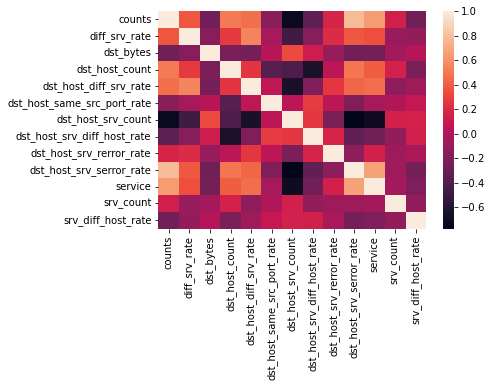

In [73]:
#corelation matrix
sns.heatmap(data_num_binary.corr())

<AxesSubplot:>

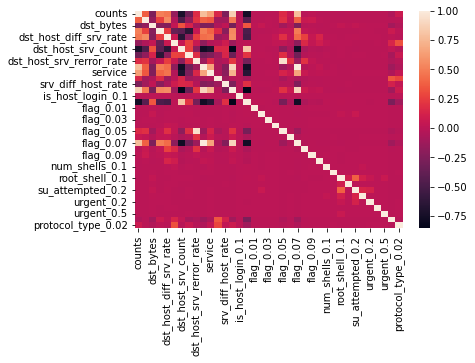

In [74]:
sns.heatmap(data_binary.corr())

In [75]:
data_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816575 entries, 0 to 3006
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   counts                       816575 non-null  float64
 1   diff_srv_rate                816575 non-null  float64
 2   dst_bytes                    816575 non-null  float64
 3   dst_host_count               816575 non-null  float64
 4   dst_host_diff_srv_rate       816575 non-null  float64
 5   dst_host_same_src_port_rate  816575 non-null  float64
 6   dst_host_srv_count           816575 non-null  float64
 7   dst_host_srv_diff_host_rate  816575 non-null  float64
 8   dst_host_srv_rerror_rate     816575 non-null  float64
 9   dst_host_srv_serror_rate     816575 non-null  float64
 10  service                      816575 non-null  float64
 11  srv_count                    816575 non-null  float64
 12  srv_diff_host_rate           816575 non-null  float64
 13  a

In [76]:
data_binary.rename(columns = {"flag_0.01" : "flag_01","flag_0.02":"flag_02","flag_0.03":"flag_03","flag_0.04":"flag_04",
                             "flag_0.05":"flag_05","flag_0.06":"flag_06","flag_0.07":"flag_07","flag_0.08":"flag_08",
                             "flag_0.09":"flag_09","flag_0.1":"flag_1","su_attempted_0.1":"su_attempted_1","su_attempted_0.2":"su_attempted_2",
                              "urgent_0.1":"urgent_1","urgent_0.2":"urgent_2","urgent_0.3":"urgent_3",
                              "urgent_0.5":"urgent_5","protocol_type_0.01":"protocol_type_1","protocol_type_0.02":"protocol_type_2",
                             "num_shells_0.1":"num_shells_1","num_shells_0.2":"num_shells_2","is_host_login_0.1":"is_host_login_1",
                             "logged_in_0.1":"logged_in_1","root_shell_0.1":"root_shell_1" },inplace=True)

In [77]:
data_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816575 entries, 0 to 3006
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   counts                       816575 non-null  float64
 1   diff_srv_rate                816575 non-null  float64
 2   dst_bytes                    816575 non-null  float64
 3   dst_host_count               816575 non-null  float64
 4   dst_host_diff_srv_rate       816575 non-null  float64
 5   dst_host_same_src_port_rate  816575 non-null  float64
 6   dst_host_srv_count           816575 non-null  float64
 7   dst_host_srv_diff_host_rate  816575 non-null  float64
 8   dst_host_srv_rerror_rate     816575 non-null  float64
 9   dst_host_srv_serror_rate     816575 non-null  float64
 10  service                      816575 non-null  float64
 11  srv_count                    816575 non-null  float64
 12  srv_diff_host_rate           816575 non-null  float64
 13  a

In [78]:
data_binary.attack_type_1

0       1
1       1
2       1
3       1
4       1
       ..
3002    1
3003    1
3004    1
3005    1
3006    1
Name: attack_type_1, Length: 816575, dtype: uint8

In [79]:
#variable reduction/feature selection

In [80]:
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
#now need to calculate the accuracy
from sklearn.metrics import roc_auc_score

In [81]:
#univariate regression
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score

uni_df = []

for var in data_binary.columns.difference(['attack_type_1']):
    formula = f"attack_type_1 ~ {var}"
    model = smf.logit(formula, data=data_binary).fit_regularized(alpha=1.0, L1_wt=1.0)  # L1 regularization (Lasso)
    somerced = 2 * roc_auc_score(data_binary.attack_type_1, model.predict(data_binary)) - 1
    uni_df.append(somerced)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.14010803213211137
            Iterations: 23
            Function evaluations: 23
            Gradient evaluations: 23


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.32040769248693224
            Iterations: 27
            Function evaluations: 28
            Gradient evaluations: 27


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18096751032404396
            Iterations: 65
            Function evaluations: 235
            Gradient evaluations: 65


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3985613812814854
            Iterations: 21
            Function evaluations: 21
            Gradient evaluations: 21


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.35119933196915415
            Iterations: 27
            Function evaluations: 27
            Gradient evaluations: 27


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.59550518957057
            Iterations: 23
            Function evaluations: 23
            Gradient evaluations: 23


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1426767262378814
            Iterations: 24
            Function evaluations: 25
            Gradient evaluations: 24


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.45296403750546166
            Iterations: 29
            Function evaluations: 29
            Gradient evaluations: 29
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5837649495009852
            Iterations: 21
            Function evaluations: 21
            Gradient evaluations: 21


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17228686652581857
            Iterations: 28
            Function evaluations: 28
            Gradient evaluations: 28


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.60544596972424
            Iterations: 18
            Function evaluations: 19
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6053448254573045
            Iterations: 20
            Function evaluations: 20
            Gradient evaluations: 20
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6054721880208006
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6054393299934904
            Iterations: 18
            Function evaluations: 18
            Gradient evaluations: 18


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5883006708439639
            Iterations: 15
            Function evaluations: 15
            Gradient evaluations: 15


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6035088320832234
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17452389111278663
            Iterations: 22
            Function evaluations: 22
            Gradient evaluations: 22


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.603298447565801
            Iterations: 21
            Function evaluations: 21
            Gradient evaluations: 21


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6052973126294274
            Iterations: 21
            Function evaluations: 21
            Gradient evaluations: 21
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6050418123300162
            Iterations: 20
            Function evaluations: 21
            Gradient evaluations: 20
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6054721880842014
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17707221131255513
            Iterations: 18
            Function evaluations: 19
            Gradient evaluations: 18


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6054108160709334
            Iterations: 21
            Function evaluations: 21
            Gradient evaluations: 21
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6054721880842014
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5973078932025564
            Iterations: 17
            Function evaluations: 17
            Gradient evaluations: 17


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6027431455332284
            Iterations: 17
            Function evaluations: 17
            Gradient evaluations: 17


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6054311285791656
            Iterations: 17
            Function evaluations: 17
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.16409539432745537
            Iterations: 23
            Function evaluations: 23
            Gradient evaluations: 23


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6050650513590421
            Iterations: 16
            Function evaluations: 16
            Gradient evaluations: 16


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5225755581887953
            Iterations: 26
            Function evaluations: 26
            Gradient evaluations: 26


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6054721877692137
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6054721867550207
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.605472188085538
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6054721880842013
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6054721880842014
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6054721880842014
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6


C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


In [82]:
uni_df = pd.concat([pd.Series(data_binary.columns.difference(['attack_type_1'])),pd.Series(uni_df)],axis=1)

In [83]:
uni_df

,0,1
0,counts,0.949960
1,diff_srv_rate,0.954282
2,dst_bytes,0.930723
3,dst_host_count,0.665407
4,dst_host_diff_srv_rate,0.908427
5,dst_host_same_src_port_rate,0.593204
6,dst_host_srv_count,0.962488
7,dst_host_srv_diff_host_rate,0.610593
8,dst_host_srv_rerror_rate,0.085033
9,dst_host_srv_serror_rate,0.838489


In [84]:
uni_df.columns = ['feature','gini']
imp_vars_uni_df = uni_df.sort_values(by='gini',ascending=False).head(20)

In [85]:
imp_vars_uni = list(imp_vars_uni_df.feature.values)
imp_vars_uni

['dst_host_srv_count',
 'diff_srv_rate',
 'counts',
 'dst_bytes',
 'service',
 'dst_host_diff_srv_rate',
 'logged_in_1',
 'flag_07',
 'dst_host_srv_serror_rate',
 'dst_host_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_same_src_port_rate',
 'srv_diff_host_rate',
 'flag_05',
 'dst_host_srv_rerror_rate',
 'protocol_type_1',
 'protocol_type_2',
 'flag_06',
 'flag_08',
 'flag_1']

In [86]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [87]:
#can also get top 20 variable with the help of RFE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

X = data_binary[data_binary.columns.difference(['attack_type_1'])]
Y = data_binary['attack_type_1']

In [88]:
base_classifier = RandomForestClassifier()


In [89]:
rfecv = RFECV(estimator=base_classifier, step=1, cv=5, scoring='roc_auc', n_jobs=-1)

In [92]:
rfecv.fit(X, Y)

RFECV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1, scoring='roc_auc')

In [93]:
rfecv.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True])

In [94]:
X.columns[rfecv.get_support()]

Index(['counts', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_count', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'flag_01',
       'flag_02', 'flag_03', 'flag_04', 'flag_05', 'flag_06', 'flag_07',
       'flag_08', 'flag_09', 'flag_1', 'logged_in_1', 'num_shells_1',
       'protocol_type_1', 'protocol_type_2', 'root_shell_1', 'service',
       'srv_count', 'srv_diff_host_rate', 'su_attempted_1', 'su_attempted_2',
       'urgent_1', 'urgent_5'],
      dtype='object')

In [96]:
imp_var_rfe = list(X.columns[rfecv.get_support()])

In [97]:
#select KBest
from sklearn.feature_selection import SelectKBest, f_classif

SKB = SelectKBest(f_classif,k=20).fit(X,Y)
X.columns[SKB.get_support()].values

array(['counts', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_count', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'flag_05',
       'flag_06', 'flag_07', 'flag_08', 'flag_1', 'logged_in_1',
       'protocol_type_1', 'protocol_type_2', 'service',
       'srv_diff_host_rate'], dtype=object)

In [98]:
imp_var_SKB = list(X.columns[SKB.get_support()])
imp_var_SKB

['counts',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'flag_05',
 'flag_06',
 'flag_07',
 'flag_08',
 'flag_1',
 'logged_in_1',
 'protocol_type_1',
 'protocol_type_2',
 'service',
 'srv_diff_host_rate']

In [99]:
#final list(from Univariate, RFE, SelectKbest)

In [100]:
Final_list = list(set(imp_var_SKB + imp_vars_uni + imp_var_rfe))
Final_list

['flag_04',
 'flag_01',
 'dst_host_diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_srv_diff_host_rate',
 'flag_07',
 'urgent_1',
 'protocol_type_2',
 'flag_08',
 'su_attempted_1',
 'counts',
 'flag_09',
 'protocol_type_1',
 'flag_06',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_count',
 'flag_02',
 'logged_in_1',
 'flag_1',
 'su_attempted_2',
 'dst_bytes',
 'srv_count',
 'diff_srv_rate',
 'flag_05',
 'dst_host_srv_serror_rate',
 'dst_host_same_src_port_rate',
 'service',
 'flag_03',
 'urgent_5',
 'dst_host_count',
 'root_shell_1',
 'num_shells_1']

In [101]:
X = data_binary[Final_list]

In [102]:
X.columns

Index(['flag_04', 'flag_01', 'dst_host_diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_srv_diff_host_rate', 'flag_07', 'urgent_1', 'protocol_type_2',
       'flag_08', 'su_attempted_1', 'counts', 'flag_09', 'protocol_type_1',
       'flag_06', 'dst_host_srv_rerror_rate', 'dst_host_srv_count', 'flag_02',
       'logged_in_1', 'flag_1', 'su_attempted_2', 'dst_bytes', 'srv_count',
       'diff_srv_rate', 'flag_05', 'dst_host_srv_serror_rate',
       'dst_host_same_src_port_rate', 'service', 'flag_03', 'urgent_5',
       'dst_host_count', 'root_shell_1', 'num_shells_1'],
      dtype='object')

In [103]:
#Information Value calculation
def calculate_woe_iv(dataset,feature,target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value':val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good']  = dset['Good']/dset['Good'].sum()
    dset['Distr_Bad']  = dset['Bad']/dset['Bad'].sum()
    dset['WOE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'] )
    dset = dset.replace({'WOE' :{np.inf:0,-np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad'])*dset['WOE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WOE')
    return dset,iv

In [106]:
for col in data_binary:
    if col == 'attack_type_1': continue
    else:
        print('WOE and IV for column: {}'.format(col))
        df,iv = calculate_woe_iv(data_binary,col,'attack_type_1')
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WOE and IV for column: counts
IV score: 7.22


WOE and IV for column: diff_srv_rate


C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IV score: 10.76


WOE and IV for column: dst_bytes


C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IV score: 2.65


WOE and IV for column: dst_host_count
IV score: 3.38


WOE and IV for column: dst_host_diff_srv_rate
IV score: 6.76


WOE and IV for column: dst_host_same_src_port_rate
IV score: 2.74


WOE and IV for column: dst_host_srv_count
IV score: 7.66


WOE and IV for column: dst_host_srv_diff_host_rate
IV score: 4.75


WOE and IV for column: dst_host_srv_rerror_rate
IV score: 0.44


WOE and IV for column: dst_host_srv_serror_rate


C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IV score: 10.78


WOE and IV for column: service


C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IV score: 13.00


WOE and IV for column: srv_count
IV score: 0.75


WOE and IV for column: srv_diff_host_rate
IV score: 1.84


WOE and IV for column: is_host_login_1
IV score: 0.00


WOE and IV for column: logged_in_1
IV score: 9.08


WOE and IV for column: flag_01
IV score: 0.00


WOE and IV for column: flag_02
IV score: 0.00


WOE and IV for column: flag_03
IV score: 0.00


WOE and IV for column: flag_04
IV score: 0.00


WOE and IV for column: flag_05
IV score: 0.17


WOE and IV for column: flag_06
IV score: 0.02


WOE and IV for column: flag_07
IV score: 8.11


WOE and IV for column: flag_08
IV score: 0.03


WOE and IV for column: flag_09


C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IV score: 0.00


WOE and IV for column: flag_1
IV score: 0.01


WOE and IV for column: num_shells_1
IV score: 0.00


WOE and IV for column: num_shells_2
IV score: 0.00


WOE and IV for column: root_shell_1
IV score: 0.00


WOE and IV for column: su_attempted_1
IV score: 0.00


WOE and IV for column: su_attempted_2
IV score: 0.00


WOE and IV for column: urgent_1
IV score: 0.00


WOE and IV for column: urgent_2
IV score: 0.00


WOE and IV for column: urgent_3
IV score: 0.00


WOE and IV for column: urgent_5
IV score: 0.00


WOE and IV for column: protocol_type_1
IV score: 0.10


WOE and IV for column: protocol_type_2
IV score: 0.03




In [105]:
imp_var_iv=["dst_host_srv_rerror_rate",
"srv_count",
"protocol_type_1",
"flag_05",
"flag_06",
"flag_08",
"srv_diff_host_rate"]

In [107]:
final_X=list(X.columns.values)

In [108]:
final_list=list(set(final_X+imp_var_iv))
final_list

['flag_04',
 'flag_01',
 'dst_host_diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_srv_diff_host_rate',
 'flag_07',
 'urgent_1',
 'protocol_type_2',
 'flag_08',
 'su_attempted_1',
 'counts',
 'flag_09',
 'protocol_type_1',
 'flag_06',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_count',
 'flag_02',
 'logged_in_1',
 'flag_1',
 'su_attempted_2',
 'dst_bytes',
 'srv_count',
 'diff_srv_rate',
 'flag_05',
 'dst_host_srv_serror_rate',
 'dst_host_same_src_port_rate',
 'service',
 'flag_03',
 'urgent_5',
 'dst_host_count',
 'root_shell_1',
 'num_shells_1']

In [109]:
#calculating VIF (Variance Inflation Factor)
X_new=data_binary[final_list]

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
vif = pd.DataFrame()
vif['feature']= X_new.columns
vif['VIF Value'] = [variance_inflation_factor(data_binary[final_list].values,i) for i in range(len(final_list))]

In [112]:
vif.sort_values(by='VIF Value',ascending=False)

,feature,VIF Value
24,dst_host_srv_serror_rate,651.125253
5,flag_07,649.297899
14,dst_host_srv_rerror_rate,32.324294
23,flag_05,29.303017
17,logged_in_1,18.798709
15,dst_host_srv_count,17.512134
29,dst_host_count,8.252636
10,counts,6.132953
2,dst_host_diff_srv_rate,3.070566
26,service,2.900065


In [113]:
#taking final list till counts 
final_list_of_all = ['srv_diff_host_rate','dst_bytes','protocol_type_2','dst_host_same_src_port_rate','diff_srv_rate','flag_1',
                     'flag_06','protocol_type_1','dst_host_srv_diff_host_rate','flag_08','srv_count','service','dst_host_diff_srv_rate',
                     'counts','dst_host_count']


In [114]:
#Splitting the data into train & test
X_new=data_binary[final_list_of_all]

In [115]:
target = data_binary[['attack_type_1']]
features = X_new

In [116]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [117]:
train_y,test_y,train_x,test_x = train_test_split(target,features,test_size=0.3,random_state=123)

In [118]:
#for logistic regression using statsmodels
train, test = train_test_split(data_binary, test_size=0.3, random_state=0)

In [119]:
#logistic regression
formula='attack_type_1 ~ ' + "+".join(final_list_of_all)
formula

'attack_type_1 ~ srv_diff_host_rate+dst_bytes+protocol_type_2+dst_host_same_src_port_rate+diff_srv_rate+flag_1+flag_06+protocol_type_1+dst_host_srv_diff_host_rate+flag_08+srv_count+service+dst_host_diff_srv_rate+counts+dst_host_count'

In [120]:
logreg = smf.logit(formula=formula, data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.027550
         Iterations 18


In [121]:
print(result.summary2())

                                  Results: Logit
Model:                    Logit                 Method:                MLE        
Dependent Variable:       attack_type_1         Pseudo R-squared:      0.955      
Date:                     2023-07-29 21:21      AIC:                   31526.8983 
No. Observations:         571602                BIC:                   31706.9975 
Df Model:                 15                    Log-Likelihood:        -15747.    
Df Residuals:             571586                LL-Null:               -3.4610e+05
Converged:                1.0000                LLR p-value:           0.0000     
No. Iterations:           18.0000               Scale:                 1.0000     
----------------------------------------------------------------------------------
                              Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
----------------------------------------------------------------------------------
Intercept                     -8.9264 

In [122]:
#mathematical equation
#LE = -8.8108+15.0970*srv_diff_host_rate-808.2675*dst_bytes+2.7910*protocol_type_2+22.1416*dst_host_same_src_port_rate+
#     52.7853*diff_srv_rate+6.5233*6.5233*flag_06+1.3716*flag_06-2.7101*protocol_type_1+172.4954*dst_host_srv_diff_host_rate+
#     10.0950*flag_08-90.4708*-90.4708*srv_count+5.4769*service+93.9197*dst_host_diff_srv_rate+64.1938*counts+26.3277*dst_host_count

In [123]:
#multi classification

In [124]:

multi_data=data_all[data_all.columns.difference(["attack_type"])]

In [125]:
cat_var_multi=["attack_class",
"is_host_login",

"logged_in",
"flag",

"num_shells",
"root_shell",
"su_attempted",
"urgent",

"protocol_type"]

In [126]:
data_cat_multi=multi_data[cat_var_multi]

In [127]:
data_num_multi=multi_data[multi_data.columns.difference(cat_var_multi)]

In [128]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x

In [129]:
data_num_multi=data_num_multi.apply(outlier_capping)

In [130]:
data_cat_binary=pd.get_dummies(data_cat_binary, drop_first=True)

In [131]:
data_cat_multi.head()

,attack_class,is_host_login,logged_in,flag,num_shells,root_shell,su_attempted,urgent,protocol_type
0,U2R,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0
1,U2R,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0
2,U2R,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
3,U2R,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0
4,U2R,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0


In [132]:
data_cat_multi_target=data_cat_multi.attack_class

In [133]:
data_cat_multi_no_target=data_cat_multi[data_cat_multi.columns.difference(["attack_class"])]

In [134]:
data_cat_multi=pd.get_dummies(data_cat_multi_no_target, drop_first=True)

C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [135]:

data_multi=pd.concat([data_num_multi,data_cat_multi,data_cat_multi_target],axis=1)

In [136]:
data_multi

,counts,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,...,protocol_type_0.01,protocol_type_0.02,root_shell_0.1,su_attempted_0.1,su_attempted_0.2,urgent_0.1,urgent_0.2,urgent_0.3,urgent_0.5,attack_class
0,0.001,0.0,0.02957,0.001,0.000,0.100,0.003,0.018,0.0,0.0,...,0,0,1,0,0,0,0,0,0,U2R
1,0.001,0.0,0.02766,0.002,0.000,0.050,0.004,0.018,0.0,0.0,...,0,0,1,0,0,0,0,0,0,U2R
2,0.001,0.0,0.06707,0.001,0.000,0.100,0.001,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,U2R
3,0.001,0.0,0.04551,0.001,0.000,0.100,0.001,0.000,0.0,0.0,...,0,0,1,0,0,0,0,0,0,U2R
4,0.001,0.0,0.03095,0.002,0.000,0.050,0.002,0.000,0.0,0.0,...,0,0,1,0,0,0,0,0,0,U2R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.251,0.0,0.00000,0.255,0.001,0.098,0.251,0.000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,DOS
3003,0.252,0.0,0.00000,0.255,0.001,0.099,0.252,0.000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,DOS
3004,0.253,0.0,0.00000,0.255,0.001,0.099,0.253,0.000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,DOS
3005,0.254,0.0,0.00000,0.255,0.001,0.100,0.254,0.000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,DOS


<AxesSubplot:>

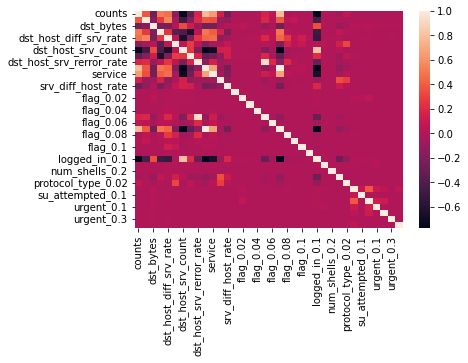

In [137]:
sns.heatmap(data_multi.corr())

In [138]:
X_new_multi=data_multi[data_multi.columns.difference(['attack_class'])]

In [139]:
target_multi = data_multi[['attack_class']]
features_multi = X_new_multi

In [140]:
train_y_multi, test_y_multi, train_X_multi, test_X_multi = train_test_split(target_multi,features_multi, test_size=0.3, random_state=123)

In [141]:
train_multi, test_multi = train_test_split(data_multi, test_size=0.3, random_state=123)

In [142]:
model_reg = LogisticRegression()
model_reg.fit(train_X_multi, train_y_multi)

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [143]:
y_pred_train=model_reg.predict(train_X_multi)

In [144]:
y_pred_test=model_reg.predict(test_X_multi)

In [145]:
print(metrics.classification_report( train_y_multi, y_pred_train))

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         DOS       0.99      1.00      1.00    161352
       Probe       0.96      0.74      0.84      6634
         R2L       0.00      0.00      0.00        35
         U2R       0.00      0.00      0.00        26
      normal       1.00      1.00      1.00    403555

    accuracy                           1.00    571602
   macro avg       0.59      0.55      0.57    571602
weighted avg       1.00      1.00      1.00    571602



C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
print(metrics.classification_report( test_y_multi, y_pred_test))

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         DOS       0.99      1.00      1.00     68883
       Probe       0.96      0.74      0.84      2903
         R2L       0.00      0.00      0.00        18
         U2R       1.00      0.07      0.13        14
      normal       1.00      1.00      1.00    173155

    accuracy                           1.00    244973
   macro avg       0.79      0.56      0.59    244973
weighted avg       1.00      1.00      1.00    244973



C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
#Random Forest Classifier


In [148]:
model_RF=RandomForestClassifier()


In [149]:
model_RF.fit(train_X_multi, train_y_multi)

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [150]:
y_pred_train_RF=model_RF.predict(train_X_multi)

In [151]:
y_pred_test_RF=model_RF.predict(test_X_multi)

In [152]:
print(metrics.classification_report( train_y_multi, y_pred_train_RF))

              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00    161352
       Probe       1.00      1.00      1.00      6634
         R2L       1.00      1.00      1.00        35
         U2R       1.00      0.96      0.98        26
      normal       1.00      1.00      1.00    403555

    accuracy                           1.00    571602
   macro avg       1.00      0.99      1.00    571602
weighted avg       1.00      1.00      1.00    571602



In [153]:
print(metrics.classification_report( test_y_multi, y_pred_test_RF))

              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00     68883
       Probe       1.00      0.99      0.99      2903
         R2L       1.00      1.00      1.00        18
         U2R       0.80      0.29      0.42        14
      normal       1.00      1.00      1.00    173155

    accuracy                           1.00    244973
   macro avg       0.96      0.85      0.88    244973
weighted avg       1.00      1.00      1.00    244973



In [154]:
#Accuracy Metrics

In [155]:
train_gini = 2*metrics.roc_auc_score(train['attack_type_1'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['attack_type_1'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['attack_type_1'], result.predict(train))
test_auc = metrics.roc_auc_score(test['attack_type_1'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The Gini Index for the model built on the Train Data is :  0.9984284839387727
The Gini Index for the model built on the Test Data is :  0.9985882918127831
The AUC for the model built on the Train Data is :  0.9992142419693864
The AUC for the model built on the Test Data is :  0.9992941459063915


In [156]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['attack_type_1']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head(10)

,actual,prob
327477,0,2.083885e-10
52734,1,9.995856e-01
210423,0,5.475448e-07
174092,1,9.999967e-01
446592,0,4.757199e-01
177329,1,9.999999e-01
92294,1,9.977518e-01
122145,1,9.999983e-01
42438,1,9.999960e-01
2385,1,1.000000e+00


In [157]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['attack_type_1']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
527927,0,1.551773e-11
98639,1,9.999999e-01
507663,0,1.133290e-11
208370,0,2.647258e-08
121476,1,9.999980e-01


In [158]:
#finding the best cutoff to convert probabilities into categorical output
#method-1 : percentage of 1's Y variable
cut_off = train.attack_type_1.mean()
cut_off

0.29376734161182083

In [159]:
#calculate the sensivity and specifivity
result.predict(train)>0.1

327477    False
52734      True
210423    False
174092     True
446592     True
          ...  
130918    False
152232     True
117869     True
206964    False
76846     False
Length: 571602, dtype: bool

In [160]:
train_actual=train_predict.actual
train_predicted_prob=train_predict.prob

In [161]:
roc_df = pd.DataFrame()
for cut_off in np.linspace(0,1,50):
    TP = np.where(((train_actual==1) & (np.where(train_predicted_prob>cut_off,1,0)==1)),1,0)
    TN = np.where(((train_actual==0) & (np.where(train_predicted_prob>cut_off,1,0)==0)),1,0)
    FP = np.where(((train_actual==0) & (np.where(train_predicted_prob>cut_off,1,0)==1)),1,0)
    FN = np.where(((train_actual==1) & (np.where(train_predicted_prob>cut_off,1,0)==0)),1,0)
                  
    sensitivity = TP.sum()/(TP.sum() + FN.sum())
    specificity = TN.sum()/(TN.sum()+FP.sum())
    total = sensitivity + specificity
    accuracy = (TP.sum()+ TN.sum())/(TP.sum()+TN.sum()+FP.sum()+FN.sum())
     
    temp = pd.DataFrame([cut_off,sensitivity,specificity,total,accuracy]).T
    roc_df = pd.concat([roc_df,temp],axis=0)
    

In [162]:
temp

,0,1,2,3,4
0,1.0,0.0,1.0,1.0,0.706233


In [163]:
roc_df.columns = ['cut_off','sensitivity','specificity','total','accuracy']
roc_df.sort_values(by='total',ascending = False)

,cut_off,sensitivity,specificity,total,accuracy
0,0.428571,0.989138,0.993874,1.983011,0.992483
0,0.448980,0.988661,0.994322,1.982983,0.992659
0,0.408163,0.989560,0.993354,1.982914,0.992239
0,0.469388,0.988155,0.994662,1.982817,0.992750
0,0.387755,0.990037,0.992729,1.982766,0.991938
0,0.489796,0.987589,0.995001,1.982590,0.992824
0,0.367347,0.990448,0.992031,1.982479,0.991566
0,0.346939,0.990829,0.991399,1.982228,0.991232
0,0.510204,0.986881,0.995256,1.982137,0.992796
0,0.326531,0.991139,0.990683,1.981822,0.990817


In [164]:
cut_off = roc_df.sort_values(by='total',ascending=False).head(1)['cut_off'][0]
cut_off 

0.42857142857142855

In [165]:
#now we need to predict the values
train['pred_prob'] = result.predict(train)
test['pred_prob'] = result.predict(test)

In [166]:
train['pred'] = np.where(train.pred_prob>cut_off,1,0)
test['pred'] = np.where(test.pred_prob>cut_off,1,0)

In [168]:
train[['attack_type_1','pred']]

,attack_type_1,pred
327477,0,0
52734,1,1
210423,0,0
174092,1,1
446592,0,1
...,...,...
130918,0,0
152232,1,1
117869,1,1
206964,0,0


In [169]:
test[['attack_type_1','pred']]

,attack_type_1,pred
527927,0,0
98639,1,1
507663,0,0
208370,0,0
121476,1,1
...,...,...
393801,0,0
404640,0,0
24596,1,1
374023,0,0


In [170]:
#now calculate sensitivity,specificivity
print(metrics.classification_report(train.attack_type_1,train.pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    403684
           1       0.99      0.99      0.99    167918

    accuracy                           0.99    571602
   macro avg       0.99      0.99      0.99    571602
weighted avg       0.99      0.99      0.99    571602



In [171]:
#now calculate sensitivity,specificivity
print(metrics.classification_report(test.attack_type_1,test.pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    173026
           1       0.99      0.99      0.99     71947

    accuracy                           0.99    244973
   macro avg       0.99      0.99      0.99    244973
weighted avg       0.99      0.99      0.99    244973

